# **Financial Sentiment Analysis using Machine Learning Approaches**

## **Importing Libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Loding Dataset**

In [7]:
df=pd.read_csv("/content/Fin-Sntmt-Anls Data.csv",encoding='latin-1')

In [8]:
df

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


## **Changing the Header of Dataset**

In [9]:
df=df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Message'})

In [10]:
df.shape

(4845, 2)

## **Understanding Dataset**

In [11]:
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [12]:
df.sample(5)

,sentiment,Message
2105,positive,"Finnish technology group Aspocomp Group Oyj ( OMX Helsinki : ACG1V ) issued its third quarter report on Thursday ( 13 November ) , posting an operating profit of EUR0 .4 m , as compared to a loss of EUR0 .5 m in the third quarter of 2007 ."
351,positive,"Olvi , which controls a 94 percent stake in Ragutis through A. Le Coq , said in its annual report published earlier this year that the Lithuanian brewery 's sales reached 15.04 million euros last year , a rise of 20.4 percent from 12.49 million euros in 2004 ."
2042,neutral,"The decision of Tekes was based on , among other , the following grounds : the project has a significant impact on the business development of the company ."
1398,neutral,The objective of the St. Petersburg office is first to boost the Company 's maintenance business .
2360,neutral,"561,470 new shares under 2003 option rights plan Packaging company Huhtamaki Oyj reported on Monday that a total of 561,470 new shares of the company have been issued based on share subscriptions under its 2003 option rights plan ."


In [13]:
df['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

### **Observation:**
1. The Dataset contains 2 features Sentiment and Text and a total of 4845 rows of data
2. The Text column contains the actual text content that is being analyzed for sentiment.
3. Based on the type of Text the Sentiment is classified into 3 Categories – Positive, Neutral, and Negative

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   Message    4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [15]:
df.shape

(4845, 2)

In [16]:
df.describe()

,sentiment,Message
count,4845,4845
unique,3,4837
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sells stake in Morning Digital Design Oy Finnish IT company TJ Group Plc said on Friday 7 April that it had signed an agreement on selling its shares of Morning Digital Design Oy to Edita Oyj .
freq,2878,2


In [17]:
df.isnull().sum()

,0
sentiment,0
Message,0


In [18]:
df.duplicated().sum()

6

> ### The dataset has 0 Null values but 6 Duplicate values

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(4839, 2)

In [21]:
df.index = range(len(df))
df['Message'].apply(lambda x: len(x.split(' '))).sum()

111786

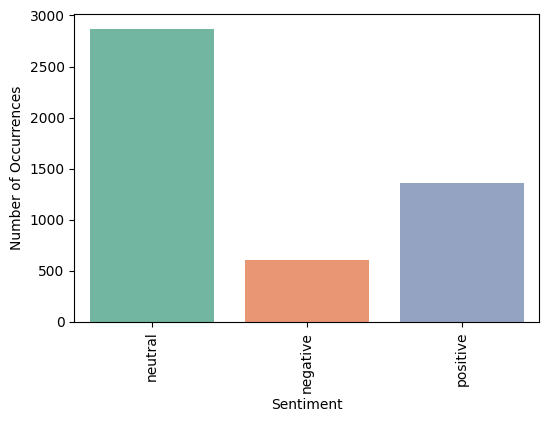

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment",data=df,palette='Set2')
plt.ylabel('Number of Occurrences')
plt.xlabel('Sentiment')
plt.xticks(rotation=90)
plt.show()


In [23]:
'''sentiment  = {'positive': 0,'neutral': 1,'negative':2}

df.sentiment = [sentiment[item] for item in df.sentiment]
print(df)'''

"sentiment  = {'positive': 0,'neutral': 1,'negative':2}\n\ndf.sentiment = [sentiment[item] for item in df.sentiment]\nprint(df)"

In [24]:
'''def print_message(index):
    example = df[df.index == index][['Message', 'sentiment']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Message:', example[1])
print_message(12)'''

"def print_message(index):\n    example = df[df.index == index][['Message', 'sentiment']].values[0]\n    if len(example) > 0:\n        print(example[0])\n        print('Message:', example[1])\nprint_message(12)"

In [25]:
'''# Print first message
print_message(0)'''

'# Print first message\nprint_message(0)'

# **Data Cleaning**

## **1. Removing unnecessary/special characters**
Clean the text by removing special characters, punctuation, and numbers

In [26]:
import re

def remove_unnecessary_characters(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)            # Removes anything that is not a letter or whitespace
    return cleaned_text

df['cleaned_text'] = df['Message'].apply(remove_unnecessary_characters)

In [27]:
df.head(2)

,sentiment,Message,cleaned_text
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",Technopolis plans to develop in stages an area of no less than square meters in order to host companies working in computer technologies and telecommunications the statement said
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily Postimees reported


## **2. Lowercasing each character in the text**
Convert all text to lowercase to ensure consistency

In [28]:
def to_lowercase(text):
    return text.lower()
df['cleaned_text'] = df['cleaned_text'].apply(to_lowercase)
df.head()

,sentiment,Message,cleaned_text
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",technopolis plans to develop in stages an area of no less than square meters in order to host companies working in computer technologies and telecommunications the statement said
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily postimees reported
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,with the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",according to the company s updated strategy for the years basware targets a longterm net sales growth in the range of with an operating profit margin of of net sales
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .,financing of aspocomp s growth aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding hdi printed circuit boards pcbs


## **3. Tokenization**
Split sentences into individual words (tokens)

In [29]:
def tokenize(text):
    return text.split()  # Split by space to get individual words

df['tokens'] = df['cleaned_text'].apply(tokenize)
df.head(2)

,sentiment,Message,cleaned_text,tokens
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",technopolis plans to develop in stages an area of no less than square meters in order to host companies working in computer technologies and telecommunications the statement said,"[technopolis, plans, to, develop, in, stages, an, area, of, no, less, than, square, meters, in, order, to, host, companies, working, in, computer, technologies, and, telecommunications, the, statement, said]"
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily postimees reported,"[the, international, electronic, industry, company, elcoteq, has, laid, off, tens, of, employees, from, its, tallinn, facility, contrary, to, earlier, layoffs, the, company, contracted, the, ranks, of, its, office, workers, the, daily, postimees, reported]"


In [30]:
dfs = df.copy()
dfs.head(2)

,sentiment,Message,cleaned_text,tokens
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",technopolis plans to develop in stages an area of no less than square meters in order to host companies working in computer technologies and telecommunications the statement said,"[technopolis, plans, to, develop, in, stages, an, area, of, no, less, than, square, meters, in, order, to, host, companies, working, in, computer, technologies, and, telecommunications, the, statement, said]"
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily postimees reported,"[the, international, electronic, industry, company, elcoteq, has, laid, off, tens, of, employees, from, its, tallinn, facility, contrary, to, earlier, layoffs, the, company, contracted, the, ranks, of, its, office, workers, the, daily, postimees, reported]"


## **4. Removing Stopwords**
Remove common stopwords like "and", "the" etc. to focus on meaningful words.

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stopwords)
df.head(2)

,sentiment,Message,cleaned_text,tokens
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",technopolis plans to develop in stages an area of no less than square meters in order to host companies working in computer technologies and telecommunications the statement said,"[technopolis, plans, develop, stages, area, less, square, meters, order, host, companies, working, computer, technologies, telecommunications, statement, said]"
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily postimees reported,"[international, electronic, industry, company, elcoteq, laid, tens, employees, tallinn, facility, contrary, earlier, layoffs, company, contracted, ranks, office, workers, daily, postimees, reported]"


## **5. Lemmatization**
Convert words to their lemma or dictionary base forms.

In [33]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [34]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['tokens'] = df['tokens'].apply(lemmatize)
df.head(2)

,sentiment,Message,cleaned_text,tokens
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",technopolis plans to develop in stages an area of no less than square meters in order to host companies working in computer technologies and telecommunications the statement said,"[technopolis, plan, develop, stage, area, le, square, meter, order, host, company, working, computer, technology, telecommunication, statement, said]"
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily postimees reported,"[international, electronic, industry, company, elcoteq, laid, ten, employee, tallinn, facility, contrary, earlier, layoff, company, contracted, rank, office, worker, daily, postimees, reported]"


## **7. Handling Null Values (If Any)**

In [35]:
df.isnull().sum()

,0
sentiment,0
Message,0
cleaned_text,0
tokens,0


No Null Values after cleaning

# **Data Visualization**

## **1. Word Cloud**
Visualize the most frequent words in positive, neutral, and negative sentiment categories

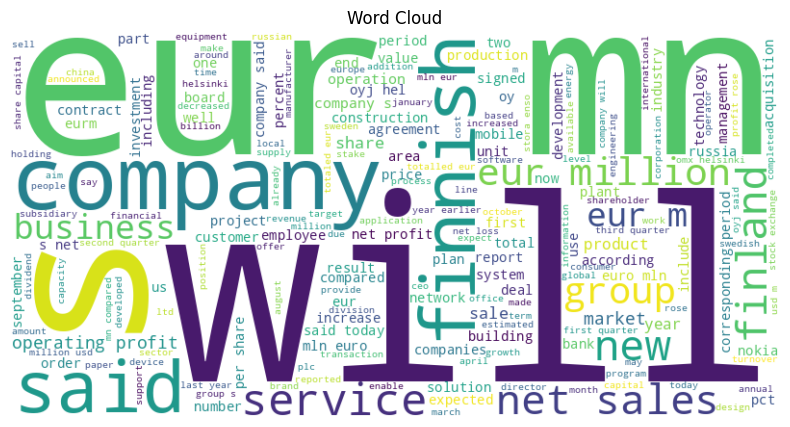

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(df):
    # Generate text for the word cloud from the 'cleaned_text' column
    all_text = ' '.join(df['cleaned_text'])

    # Create the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud')
    plt.show()

generate_wordcloud(df)

### **Sentiment Classification:**
In our analysis of the dataset, we understood that sentiment is classified into three main categories based on the presence of specific words and phrases in the text:
1. Positive :
The text containing words such as “increase”, “growth”, “successful” and "well-received” etc.… are classified as positive. These words indicate favorable outcomes.

2. Neutral :
The text containing words such as “planning”, "proposed" and "reported” etc.… are classified as neutral. These words don’t indicate favorable/unfavorable outcomes strongly.

3. Negative :
The text containing words such as “decline“, "loss“, "layoff“ and "decrease” etc.… are classified as negative. These words indicate unfavorable outcomes.

In [37]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

def plot_word_frequency(df, num_words=50):
    # Get tokens from the entire DataFrame
    all_tokens = df['tokens']
    all_words = [word for tokens in all_tokens for word in tokens]  # Flatten the list
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(num_words)

    # Separate words and counts for plotting
    words, counts = zip(*common_words)

    # Plot word frequencies
    plt.figure(figsize=(10, 8))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Top {num_words} Most Frequent Words in Entire Dataset')
    plt.xlabel('Frequency')
    plt.ylabel('Words')

    plt.tight_layout()
    plt.show()

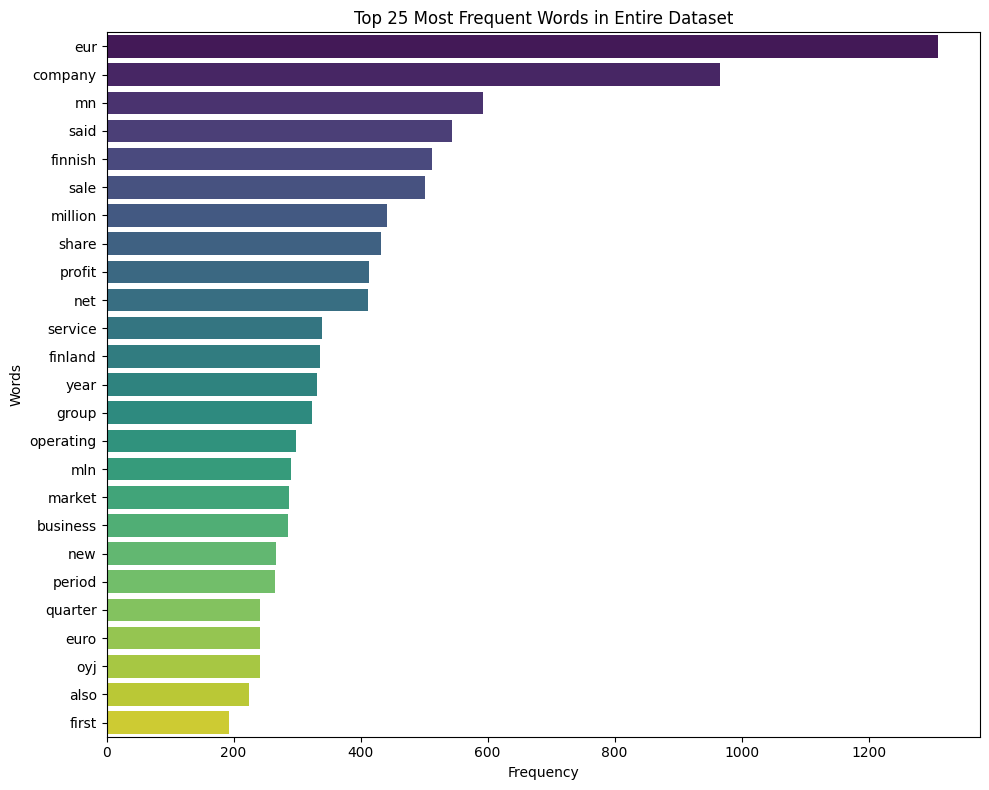

In [38]:
plot_word_frequency(df,25)

In [39]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

def plot_word_frequency_by_sentiment(df, sentiment, num_words=50):
    # Filter tokens based on the given sentiment
    sentiment_tokens = df[df['sentiment'] == sentiment]['tokens']

    # Flatten the list of tokens
    all_words = [word for tokens in sentiment_tokens for word in tokens]

    # Count word frequencies
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(num_words)

    # Separate words and counts for plotting
    words, counts = zip(*common_words)

    # Plot word frequencies
    plt.figure(figsize=(10, 8))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Top {num_words} Most Frequent Words for {sentiment.capitalize()} Sentiment')
    plt.xlabel('Frequency')
    plt.ylabel('Words')

    plt.tight_layout()
    plt.show()

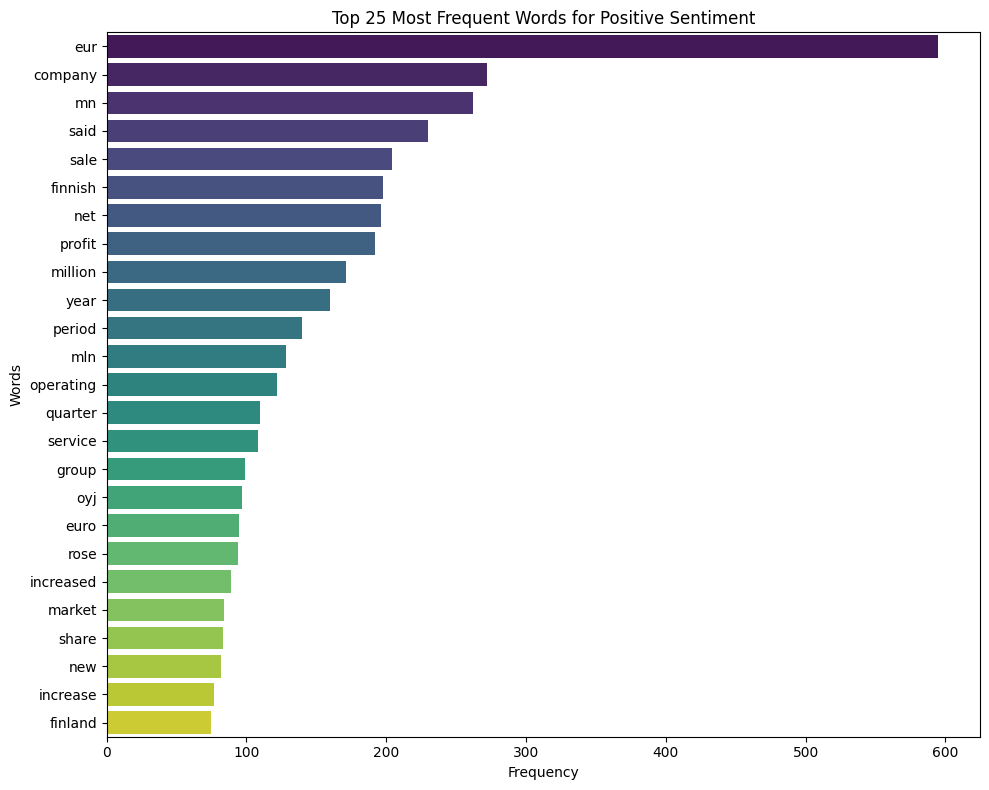

In [40]:
plot_word_frequency_by_sentiment(df, 'positive', 25)

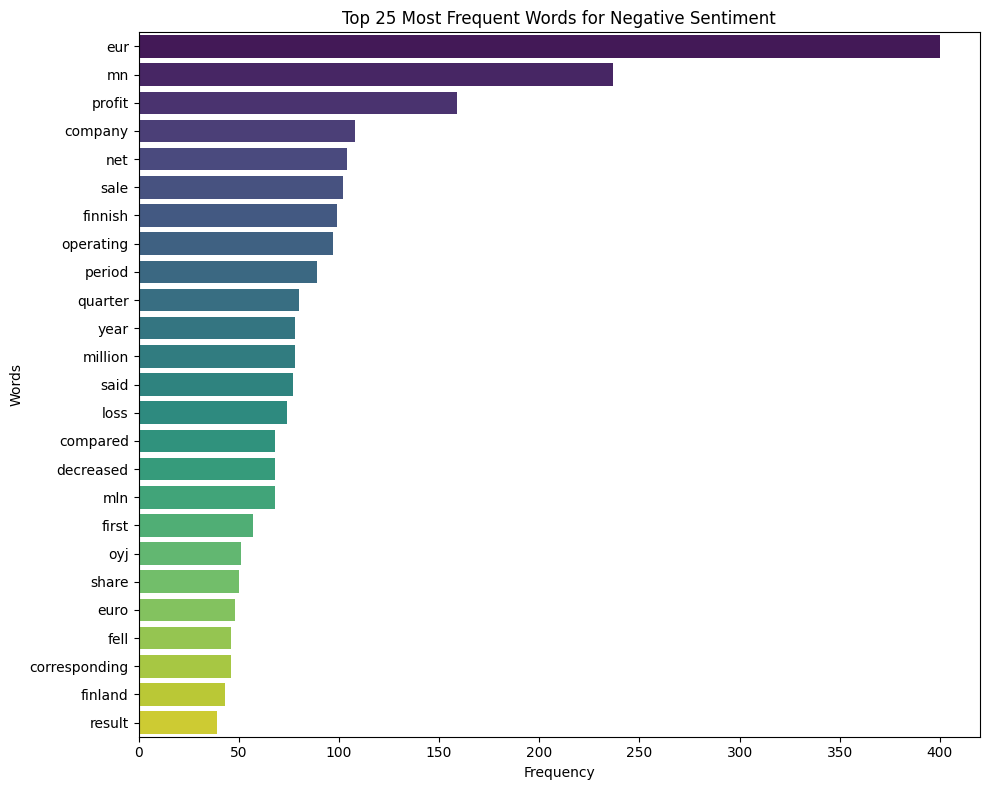

In [41]:
plot_word_frequency_by_sentiment(df, 'negative', 25)

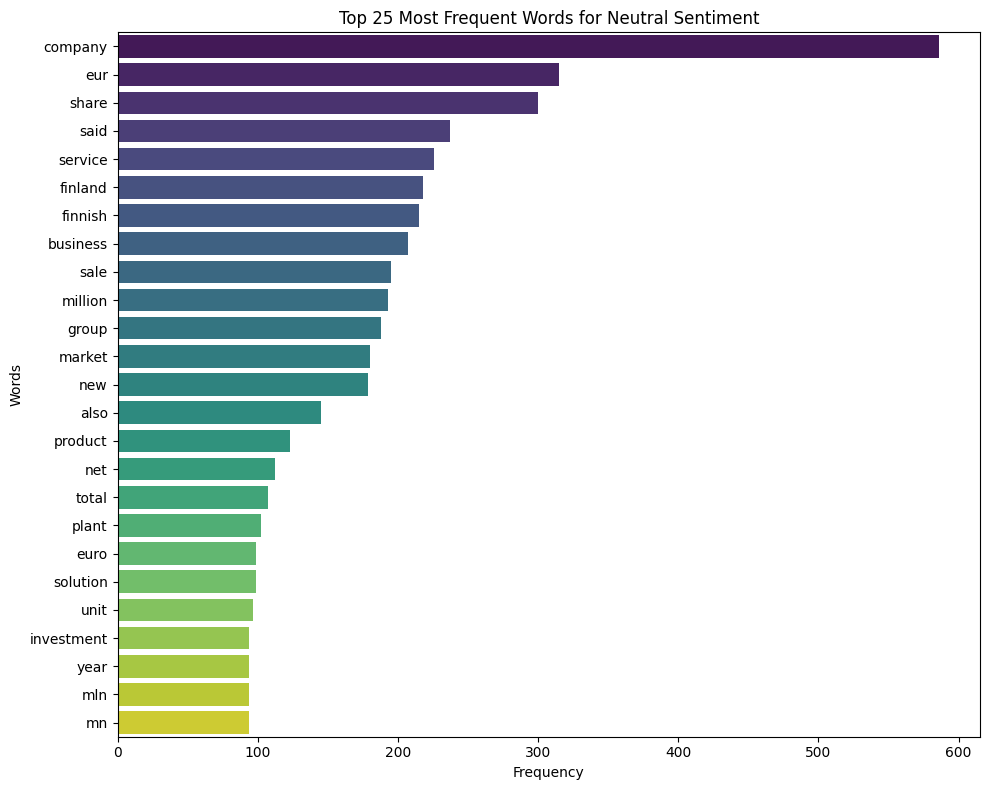

In [42]:
plot_word_frequency_by_sentiment(df, 'neutral', 25)

## **3. Bi-grams Visualization**
This will visualize the most frequent pairs (bigrams)

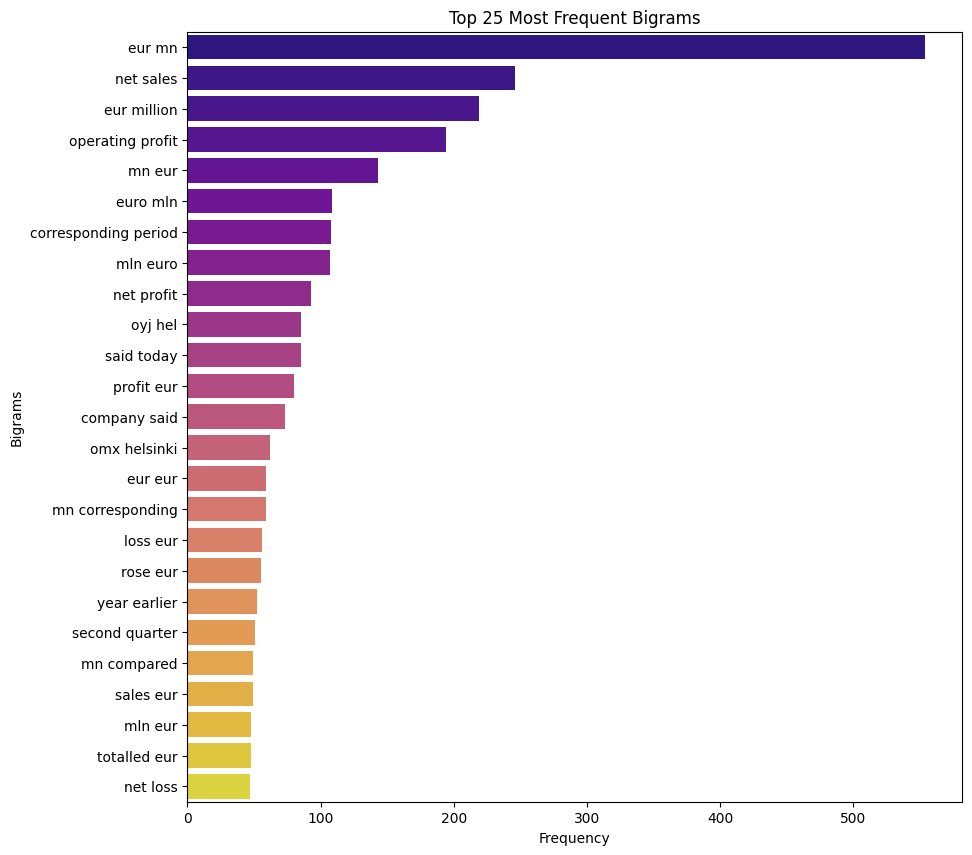

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def plot_top_ngrams(corpus, ngram_range=(2, 2), num_ngrams=25):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    ngram_counts = X.sum(axis=0).A1
    ngram_names = vectorizer.get_feature_names_out()

    ngrams_df = pd.DataFrame({'ngram': ngram_names, 'count': ngram_counts})
    top_ngrams = ngrams_df.nlargest(num_ngrams, 'count')

    plt.figure(figsize=(10,10))
    sns.barplot(x='count', y='ngram', data=top_ngrams, palette='plasma')
    plt.title(f'Top {num_ngrams} Most Frequent Bigrams')
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')
    plt.show()

corpus = df['cleaned_text'].tolist()
plot_top_ngrams(corpus, ngram_range=(2, 2))  # Bigrams

### **Observation (Bi-grams)**
1. As we knew eur is the most frequent word, it also have most frequent word pairs
2. mn is associated more with the word eur
3. The frequency of all other pairs are close to eachother and gradually decreased

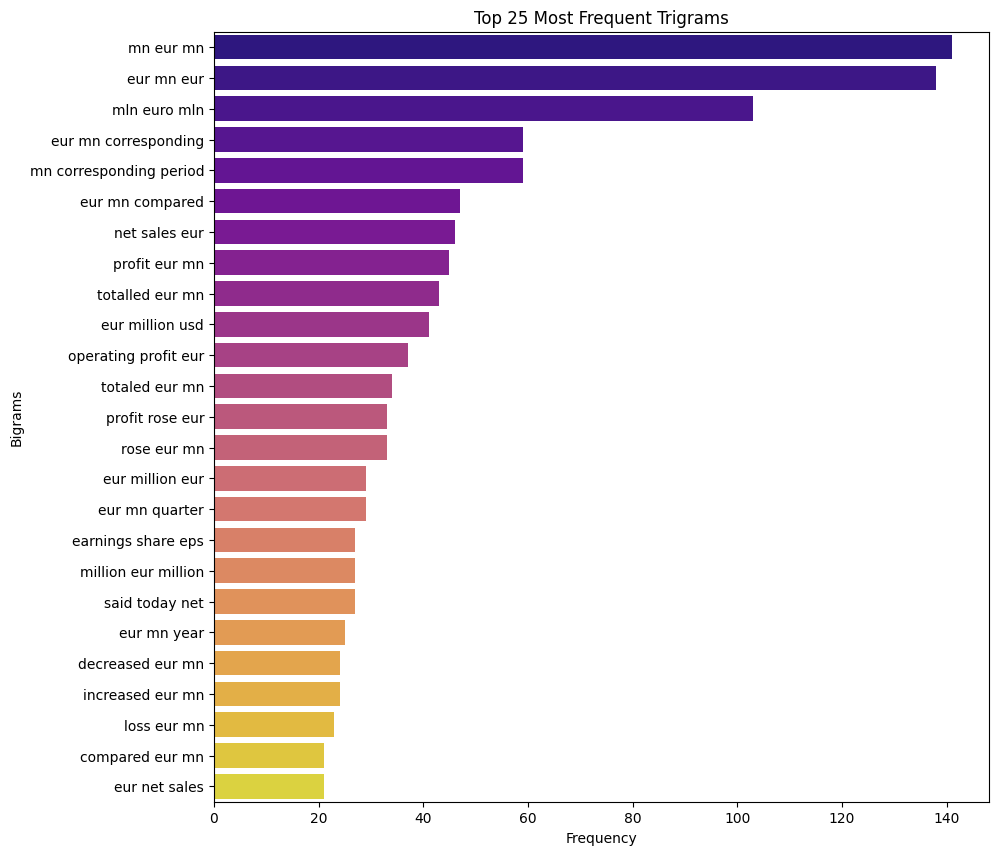

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def plot_top_ngrams(corpus, ngram_range=(2, 2), num_ngrams=25):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    ngram_counts = X.sum(axis=0).A1
    ngram_names = vectorizer.get_feature_names_out()

    ngrams_df = pd.DataFrame({'ngram': ngram_names, 'count': ngram_counts})
    top_ngrams = ngrams_df.nlargest(num_ngrams, 'count')

    plt.figure(figsize=(10,10))
    sns.barplot(x='count', y='ngram', data=top_ngrams, palette='plasma')
    plt.title(f'Top {num_ngrams} Most Frequent Trigrams')
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')
    plt.show()

    corpus = df['cleaned_text'].tolist()

plot_top_ngrams(corpus, ngram_range=(3, 3))  # Trigrams

### **Observation (tri-grams)**
1. As we knew eur and mn are the most frequent word pair, they also have most frequent word pair with other words
2. The frequency of all other pairs are close to eachother and gradually decreased

## **Data Pre-Processing**

### **1. TF-IDF (Term Frequency-Inverse Document Frequency)**
TF-IDF scores help identify the importance of words in the dataset

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(df['cleaned_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

tfidf_df.head()

,aaland,aalborg,aalto,aaltonen,aaron,aava,aazhang,ab,abb,abbott,...,zinc,zinclead,zip,zloty,zoltan,zone,zoo,zte,zu,zxx
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **2. Bag of Words**
Bag of Words converts text into a matrix of token counts.

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

bow_matrix = vectorizer.fit_transform(df['cleaned_text'])

bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

bow_df.head()

,aaland,aalborg,aalto,aaltonen,aaron,aava,aazhang,ab,abb,abbott,...,zinc,zinclead,zip,zloty,zoltan,zone,zoo,zte,zu,zxx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **3. Word2Vec**
Word2Vec represents each word as a vector. You'll need the gensim library for this.

In [47]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

# Ensure your DataFrame df with 'tokens' column is defined
# df['tokens'] should contain tokenized text data

# Step 1: Create Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Step 2: Define function to get Word2Vec vectors
def get_word2vec_vector(text):
    word_vectors = [word2vec_model.wv[word] for word in text.split() if word in word2vec_model.wv]

    if len(word_vectors) == 0:
        return np.zeros(word2vec_model.vector_size)  # Use vector_size attribute of model

    return np.mean(word_vectors, axis=0)

# Step 3: Apply the function to each text entry in the DataFrame
word2vec_matrix = np.array([get_word2vec_vector(text) for text in df['cleaned_text']])  # Use 'cleaned_text' if applicable

print(word2vec_matrix.shape)

(4839, 100)


In [48]:
print(word2vec_matrix)

[[-0.14425267  0.17778957  0.09963894 ... -0.29334453  0.01933664
  -0.01561824]
 [-0.14122741  0.17321387  0.10275623 ... -0.2836291   0.02127877
  -0.01210008]
 [-0.19867523  0.24588156  0.14159156 ... -0.4196151   0.0265767
  -0.02157091]
 ...
 [-0.39382133  0.5242651   0.23367943 ... -0.229564    0.34735826
   0.03644689]
 [-0.37908262  0.5027428   0.22653094 ... -0.2197851   0.32295614
   0.03585145]
 [-0.18694003  0.24601229  0.13363577 ... -0.35757563  0.04506387
  -0.01542549]]


### **4.doc2Vec**
Doc2Vec is an extension of Word2Vec that generates vector representations for entire documents or sentences, enabling document-level semantic analysis.

In [49]:
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pandas as pd

# Ensure your DataFrame df with 'tokens' column is defined
# df['tokens'] should contain tokenized text data

# Step 1: Create TaggedDocuments from the 'tokens' column
tagged_data = [TaggedDocument(words=tokens, tags=[str(i)]) for i, tokens in enumerate(df['tokens'])]

# Step 2: Create Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=10)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Step 3: Define function to get Doc2Vec vectors
def get_doc2vec_vector(doc_id):
    return doc2vec_model.dv[str(doc_id)]  # Retrieve the document vector by its tag (which is the document ID)

# Step 4: Apply the function to each document in the DataFrame
doc2vec_matrix = np.array([get_doc2vec_vector(i) for i in range(len(df['tokens']))])

print(doc2vec_matrix.shape)


(4839, 100)


In [50]:
print(doc2vec_matrix)

[[-0.01836292 -0.00071642 -0.00377092 ... -0.03955167  0.00777264
   0.00740559]
 [-0.04117393  0.01845237  0.01657458 ... -0.08689899  0.00615416
   0.02030437]
 [-0.00425932 -0.01752059  0.00533136 ... -0.00687023  0.00487121
  -0.00864169]
 ...
 [ 0.00197078  0.01239684  0.00114386 ...  0.01941716  0.01600872
   0.00507672]
 [-0.02973038  0.03571742  0.02326222 ... -0.0219398   0.01669543
   0.01192756]
 [-0.00896914  0.01842189  0.01946725 ... -0.00982392  0.00241942
   0.01283923]]


### **5. GloVe (Global Vectors for Word Representation)**
For GloVe, you can either train your own model or use pre-trained vectors.

In [51]:
glove_file = '/content/glove.6B.100d.txt'
glove_dict = {}

In [52]:
# Load GloVe vectors
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_dict[word] = vector

# Create GloVe matrix
def get_glove_vector(text):
    words = text.split()
    word_vectors = [glove_dict[word] for word in words if word in glove_dict]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

glove_matrix = np.array([get_glove_vector(text) for text in df['Message']])

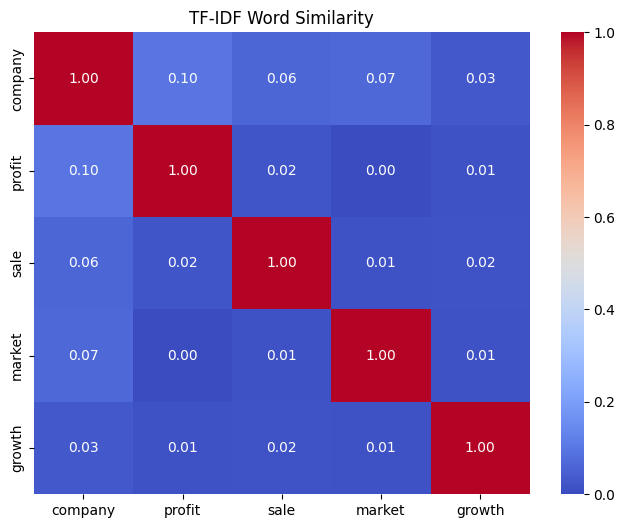

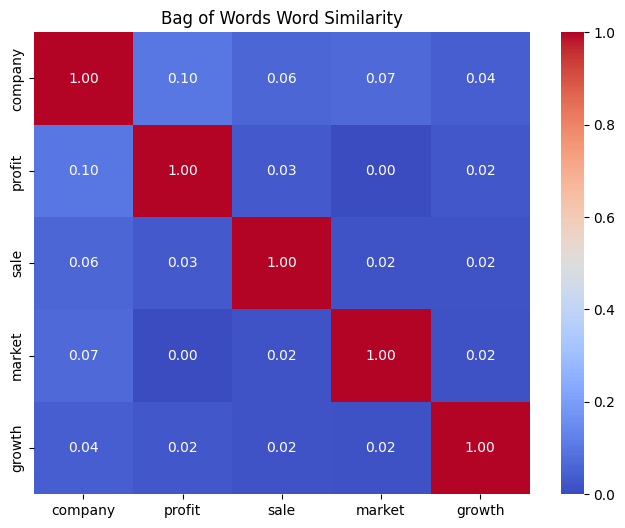

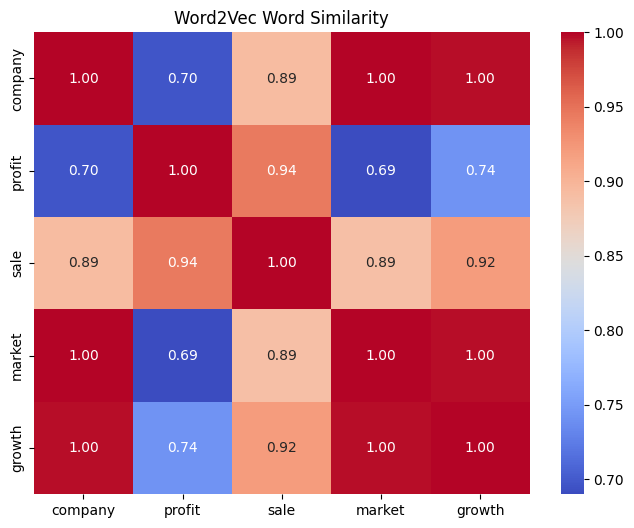

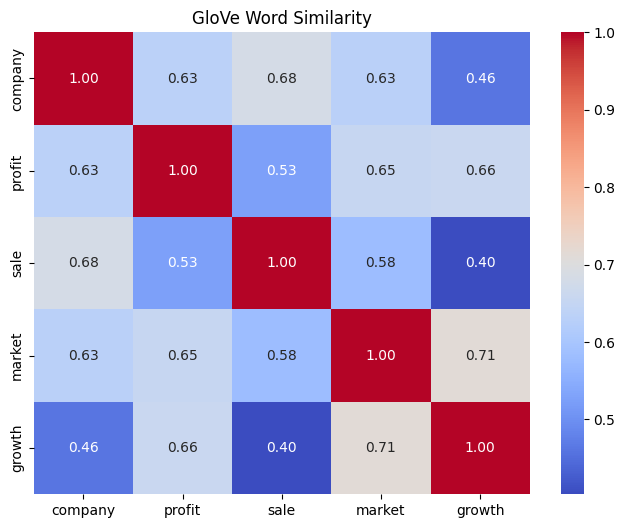

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

# Defining a function to compute and plot a heatmap for a given matrix and title
def plot_similarity_heatmap(matrix, title, words):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, cmap='coolwarm', annot=True, fmt=".2f", xticklabels=words, yticklabels=words)
    plt.title(title)
    plt.show()

# Example set of words for comparison
words = ['company', 'profit', 'sale', 'market', 'growth']

# Function to get vectors or fallback to a zero vector if the word is not found
def get_vector(model, word, fallback_dim=100):
    try:
        return model[word]
    except KeyError:
        # Return a zero vector if the word is not found
        print(f"Word '{word}' not found in vocabulary.")
        return np.zeros(fallback_dim)

### 1. TF-IDF Similarity Matrix
# Check if the words exist in the TF-IDF vocabulary
tfidf_vectors = [tfidf_df[word].values if word in tfidf_df.columns else np.zeros(tfidf_df.shape[1]) for word in words]

# Compute cosine similarity matrix
tfidf_similarity = cosine_similarity(tfidf_vectors)

# Plot heatmap for TF-IDF
plot_similarity_heatmap(tfidf_similarity, 'TF-IDF Word Similarity', words)

### 2. Bag of Words (BoW) Similarity Matrix
# Check if the words exist in the BoW vocabulary
bow_vectors = [bow_df[word].values if word in bow_df.columns else np.zeros(bow_df.shape[1]) for word in words]

# Compute cosine similarity matrix
bow_similarity = cosine_similarity(bow_vectors)

# Plot heatmap for Bag of Words
plot_similarity_heatmap(bow_similarity, 'Bag of Words Word Similarity', words)

### 3. Word2Vec Similarity Matrix
# Get Word2Vec vectors or fallback to zero vector for missing words
word2vec_vectors = [get_vector(word2vec_model.wv, word) for word in words]

# Compute cosine similarity matrix
word2vec_similarity = cosine_similarity(word2vec_vectors)

# Plot heatmap for Word2Vec
plot_similarity_heatmap(word2vec_similarity, 'Word2Vec Word Similarity', words)

### 4. GloVe Similarity Matrix
# Get GloVe vectors or fallback to zero vector for missing words
glove_vectors = [get_vector(glove_dict, word) for word in words]

# Compute cosine similarity matrix
glove_similarity = cosine_similarity(glove_vectors)

# Plot heatmap for GloVe
plot_similarity_heatmap(glove_similarity, 'GloVe Word Similarity', words)


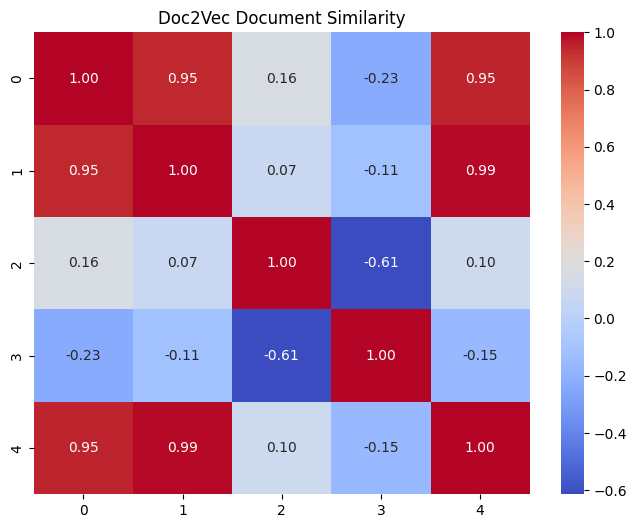

In [54]:
# Example set of document indices for comparison (you should use document indices, not words)
doc_ids = [0, 1, 2, 3, 4]  # Replace with valid document indices in your data

# Get Doc2Vec vectors for the given document IDs
doc2vec_vectors = [doc2vec_model.dv[i] for i in doc_ids]  # Retrieve document vectors by their ID

# Compute cosine similarity matrix for documents
doc2vec_similarity = cosine_similarity(doc2vec_vectors)

# Plot heatmap for Doc2Vec document similarity
plot_similarity_heatmap(doc2vec_similarity, 'Doc2Vec Document Similarity', doc_ids)


### **Observation**
Word2Vec (W2V): Shows high cosine similarity scores, effectively capturing semantic relationships among words.

Doc2Vec (D2V): Provides document-level embeddings with less granularity in word relationships, suitable for document-based tasks.

GloVe: Reflects strong global co-occurrence understanding but may show slightly lower similarity for closely related words compared to W2V.

# **Applying Machine Learning Models**

### **1. Applying Logistic Regression**

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert sentiment to numeric labels (positive -> 1, neutral -> 0, negative -> -1)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else (0 if x == 'neutral' else -1))

# Features and labels
X = list(df['word2vec'])  # Assuming 'word2vec' contains vector representations of the text
y = df['sentiment_label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.6229338842975206


In [58]:
# Accuracy on the training set
train_accuracy = log_reg.score(X_train, y_train)

# Accuracy on the test set
test_accuracy = log_reg.score(X_test, y_test)

print(f"Training Accuracy for Logistic Regression: {train_accuracy}")
print(f"Test Accuracy fro Logistic Regression: {test_accuracy}")

Training Accuracy for Logistic Regression: 0.620769826918109
Test Accuracy fro Logistic Regression: 0.6229338842975206


In [59]:
import numpy as np

# Function to preprocess and convert a sentence to Word2Vec representation
def preprocess_and_convert_to_word2vec(sentence, word2vec_model):
    # Step 1: Remove special characters and keep only alphanumeric and spaces
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

    # Step 2: Convert to lowercase
    sentence = sentence.lower()

    # Step 3: Tokenize the sentence
    tokens = sentence.split()  # Simple tokenization by splitting on spaces

    # Step 4: Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Step 5: Apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Step 6: Convert tokens to Word2Vec vectors
    word_vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]

    # Step 7: If no known words are found, return a zero vector
    if len(word_vectors) == 0:
        return np.zeros(word2vec_model.vector_size)

    # Step 8: Take the mean of the word vectors to represent the sentence
    word2vec_vector = np.mean(word_vectors, axis=0)

    return word2vec_vector

# Example input sentence
new_sentence = "The company's profits have skyrocketed this quarter, and employees are thrilled with the new opportunities for growth and innovation"

# Convert the new sentence to Word2Vec vector
new_sentence_vector = preprocess_and_convert_to_word2vec(new_sentence, word2vec_model)  # Assuming word2vec_model exists

# Reshape the vector to fit the model's expected input shape
new_sentence_vector = new_sentence_vector.reshape(1, -1)

# Predict sentiment using the trained logistic regression model
predicted_sentiment = log_reg.predict(new_sentence_vector)

# Print the predicted sentiment (1 for positive, 0 for neutral, -1 for negative)
print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: 0


### **Validation using Logistic Regression**

In [60]:
#validation 1
new_sentence = "The local electronics industry is amid layoff concerns and last year has laid off tens of employees"
new_sentence_tokens = new_sentence.split()

new_sentence_vector = get_avg_word2vec(new_sentence_tokens, word2vec_model, 100)

new_sentence_vector = np.array(new_sentence_vector).reshape(1, -1)

predicted_sentiment = log_reg.predict(new_sentence_vector)

print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: 0


In [61]:
#validation 2
new_sentence = "Congratulations! you have won a $1,000 Walmart gift card."
new_sentence_tokens = new_sentence.split()

new_sentence_vector = get_avg_word2vec(new_sentence_tokens, word2vec_model, 100)

new_sentence_vector = np.array(new_sentence_vector).reshape(1, -1)

predicted_sentiment = log_reg.predict(new_sentence_vector)

print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: 0


In [62]:
#validation 3
new_sentence = "The project faced multiple delays and ended in failure."
new_sentence_tokens = new_sentence.split()

new_sentence_vector = get_avg_word2vec(new_sentence_tokens, word2vec_model, 100)

new_sentence_vector = np.array(new_sentence_vector).reshape(1, -1)

predicted_sentiment = log_reg.predict(new_sentence_vector)

print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: 0


In [63]:
#validation 4
new_sentence = "The meeting is scheduled for next Tuesday at 10 AM."
new_sentence_tokens = new_sentence.split()

new_sentence_vector = get_avg_word2vec(new_sentence_tokens, word2vec_model, 100)

new_sentence_vector = np.array(new_sentence_vector).reshape(1, -1)

predicted_sentiment = log_reg.predict(new_sentence_vector)

print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: 0


### **2. Applying SVM Classifier**

In [64]:
from sklearn.svm import SVC

# Initialize the model
svm_classifier = SVC(random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on both training and test data
y_train_pred_svm = svm_classifier.predict(X_train)
y_test_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy for training and test sets
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print("SVM Classifier:")
print("")
print(f"SVM Training Accuracy: {train_accuracy_svm}")
print(f"SVM Test Accuracy: {test_accuracy_svm}")

SVM Classifier:

SVM Training Accuracy: 0.6220614828209765
SVM Test Accuracy: 0.6146694214876033


### **Validation using SVM Classifier**

In [69]:
#validation 1
new_sentence = "The local electronics industry is amid layoff concerns and last year has laid off tens of employees"
new_sentence_tokens = new_sentence.split()

new_sentence_vector = get_avg_word2vec(new_sentence_tokens, word2vec_model, 100)

new_sentence_vector = np.array(new_sentence_vector).reshape(1, -1)

predicted_sentiment = svm_classifier.predict(new_sentence_vector)

print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: 0


In [70]:
#validation 2
new_sentence = "Congratulations! you have won a $1,000 Walmart gift card."
new_sentence_tokens = new_sentence.split()

new_sentence_vector = get_avg_word2vec(new_sentence_tokens, word2vec_model, 100)

new_sentence_vector = np.array(new_sentence_vector).reshape(1, -1)

predicted_sentiment = svm_classifier.predict(new_sentence_vector)

print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: 0


In [71]:
#validation 3
new_sentence = "The project faced multiple delays and ended in failure."
new_sentence_tokens = new_sentence.split()

new_sentence_vector = get_avg_word2vec(new_sentence_tokens, word2vec_model, 100)

new_sentence_vector = np.array(new_sentence_vector).reshape(1, -1)

predicted_sentiment = svm_classifier.predict(new_sentence_vector)

print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: 0


In [72]:
#validation 4
new_sentence = "The meeting is scheduled for next Tuesday at 10 AM."
new_sentence_tokens = new_sentence.split()

new_sentence_vector = get_avg_word2vec(new_sentence_tokens, word2vec_model, 100)

new_sentence_vector = np.array(new_sentence_vector).reshape(1, -1)

predicted_sentiment = svm_classifier.predict(new_sentence_vector)

print(f"Predicted Sentiment for the new sentence: {predicted_sentiment[0]}")

Predicted Sentiment for the new sentence: 0


***

### **Observation**
***
**Logistic Regression:** Demonstrated effectiveness in binary classification, offering clear interpretability and performing reasonably well in distinguishing between sentiment categories.

**Support Vector Classifier (SVC):**Outperformed other models with its ability to find optimal hyperplanes, providing robust performance in separating positive, negative, and neutral sentiments.

While Logistic Regression and SVC  provided reasonable performance, they were not significantly better in accurately predicting positive, negative, and neutral sentiments.

**LSTM (Long Short-Term Memory):** Preferred for its ability to capture long-term dependencies and context in sequential data, offering improved accuracy in sentiment classification tasks.

### **3. Applying LSTM**

In [73]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [74]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec # Doc Vector model
from sklearn import utils # It helps to generate the charts
from sklearn.model_selection import train_test_split # To split the data
from tensorflow.keras.preprocessing.sequence import pad_sequences
import gensim # to represant the data in vectors
from sklearn.linear_model import LogisticRegression # Logistic regression
from gensim.models.doc2vec import TaggedDocument


In [75]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [76]:
sentiment  = {'positive': 0,'neutral': 1,'negative':2}

df.sentiment = [sentiment[item] for item in df.sentiment]
#print(df)

In [77]:
import re
from bs4 import BeautifulSoup # it helps to clean the sentence
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text)
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['Message'] = df['Message'].apply(cleanText)

In [78]:
df['Message'] = df['Message'].apply(cleanText)
train, test = train_test_split(df, test_size=0.000001 , random_state=42)
import nltk # natural language tool kit helps to tocanised the data
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            #if len(word) < 0:
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)

# The maximum number of words to be used. (most frequent)
max_fatures = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50

#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Message'].values)
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X)
print('Found %s unique tokens.' % len(X))

Found 4839 unique tokens.


In [118]:
import pickle

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [79]:
# make tose words in numirical dots
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (4839, 50)


In [80]:
train_tagged.values

array([TaggedDocument(words=['on', 'dec.', '1', ',', 'grimaldi', 'acquired', '1.5', 'million', 'shares', 'and', 'a', '50.1-percent', 'stake', 'in', 'finnlines', '.'], tags=[1]),
       TaggedDocument(words=['the', 'etracted', 'filtrates', 'are', 'very', 'high', 'in', 'clarity', 'while', 'the', 'dried', 'filter', 'cakes', 'meet', 'required', 'transport', 'moisture', 'limits', '(', 'tmls', ')', 'for', 'their', 'ore', 'grades', '.'], tags=[1]),
       TaggedDocument(words=['the', 'use', 'case', 'dramatically', 'narrows', 'if', 'you', 'go', 'only', 'with', 'the', 'hot', 's', 'ltd', '.'], tags=[1]),
       ...,
       TaggedDocument(words=['purchase', 'it', 'for', 'the', '12mp', 'snapper', ',', 'if', 'nothing', 'else', '.'], tags=[1]),
       TaggedDocument(words=['the', 'changes', 'in', 'readership', 'were', 'not', 'significant', '.'], tags=[1]),
       TaggedDocument(words=['(', 'adp', 'news', ')', '-', 'oct', '31', ',', '2008', '-', 'finnish', 'food', 'company', 'raisio', 'oyj', '(', 'om

In [81]:
d2v_model = Doc2Vec(dm=1,vector_size=20, dm_mean=1, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065,epochs=5)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 4838/4838 [00:00<00:00, 1493379.65it/s]


In [82]:
for epoch in range(30):
    d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

100%|██████████| 4838/4838 [00:00<00:00, 1709235.41it/s]


In [83]:
print(d2v_model)

Doc2Vec<dm/m,d20,n5,w8,s0.001>


In [84]:
len(d2v_model.wv)

11680

In [88]:
embedding_matrix = np.zeros((len(d2v_model.wv)+ 1, 20))
for i, vec in enumerate(d2v_model.docvecs.vectors):
    while i in vec <= 1000:

          embedding_matrix[i]=vec

In [89]:
d2v_model.wv.most_similar(positive=['profit'], topn=10)

[('loss', 0.8657456040382385),
 ('income', 0.7926745414733887),
 ('mistake', 0.7672240138053894),
 ('franc', 0.7610746622085571),
 ('sales', 0.7447219491004944),
 ('bank', 0.6906423568725586),
 ('swiss', 0.6887127161026001),
 ('returned', 0.6886447072029114),
 ('bill', 0.6875287890434265),
 ('cardona', 0.6817155480384827)]

In [90]:
d2v_model.wv.most_similar(negative=['profit'], topn=10)

[('energy-efficient', 0.7498326897621155),
 ('sheet-metal', 0.6549702286720276),
 ('requirements', 0.6427016854286194),
 ('double-checked', 0.63124018907547),
 ('combines', 0.6222464442253113),
 ('eur25m', 0.6194871068000793),
 ('venezuel', 0.6141483187675476),
 ('communal', 0.5992226004600525),
 ('130-hectare', 0.5935894250869751),
 ('lg', 0.588675856590271)]

In [91]:
# Top 10 with investment word
d2v_model.wv.most_similar(positive=['investment'], topn=10)

[('fair', 0.7563462257385254),
 ('fund', 0.7550086975097656),
 ('organization', 0.7547183036804199),
 ('operative', 0.7392476797103882),
 ('roi', 0.7238019704818726),
 ('property', 0.7203068733215332),
 ('renovate', 0.7055560946464539),
 ('4.88', 0.6931983828544617),
 ('pioneer', 0.6873285174369812),
 ('epense', 0.6851099729537964)]

In [92]:
# Top 10 with broke word
d2v_model.wv.most_similar(positive=['broke'], topn=10)

[('mold', 0.9675581455230713),
 ('143.9', 0.8730785846710205),
 ('macro-economic', 0.8658515810966492),
 ('gather', 0.8562312722206116),
 ('nau', 0.8536872863769531),
 ('brockpahler', 0.8466586470603943),
 ('wider', 0.8424937129020691),
 ('comfortably', 0.8411770462989807),
 ('kelly', 0.8391242027282715),
 ('colleagues', 0.8276576399803162)]

In [93]:
#Plot Similarity word in Doc2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Input

# Initialize model
model = Sequential()

# Input layer to define the shape of the input data
model.add(Input(shape=(50,)))  # Assuming input length is 50

# Embed word vectors (input_length is defined here)
model.add(Embedding(input_dim=len(d2v_model.wv) + 1, output_dim=20, weights=[embedding_matrix], trainable=True))

# LSTM layer
model.add(LSTM(50, return_sequences=False))

# Dense layer with softmax for multi-class classification
model.add(Dense(3, activation="softmax"))

# Model summary
model.summary()

# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 50, 20)              │         233,620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50)                  │          14,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 247,973 (968.64 KB)

 Trainable params: 247,973 (968.64 KB)

 Non-trainable params: 0 (0.00 B)

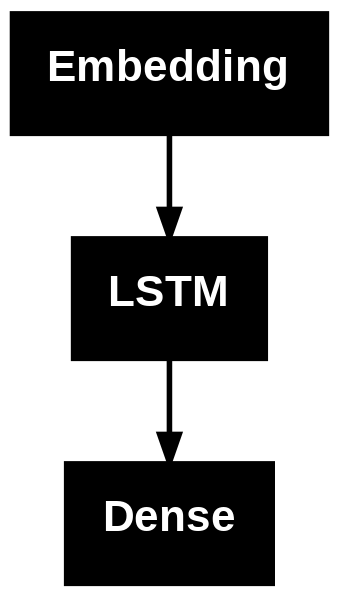

In [95]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

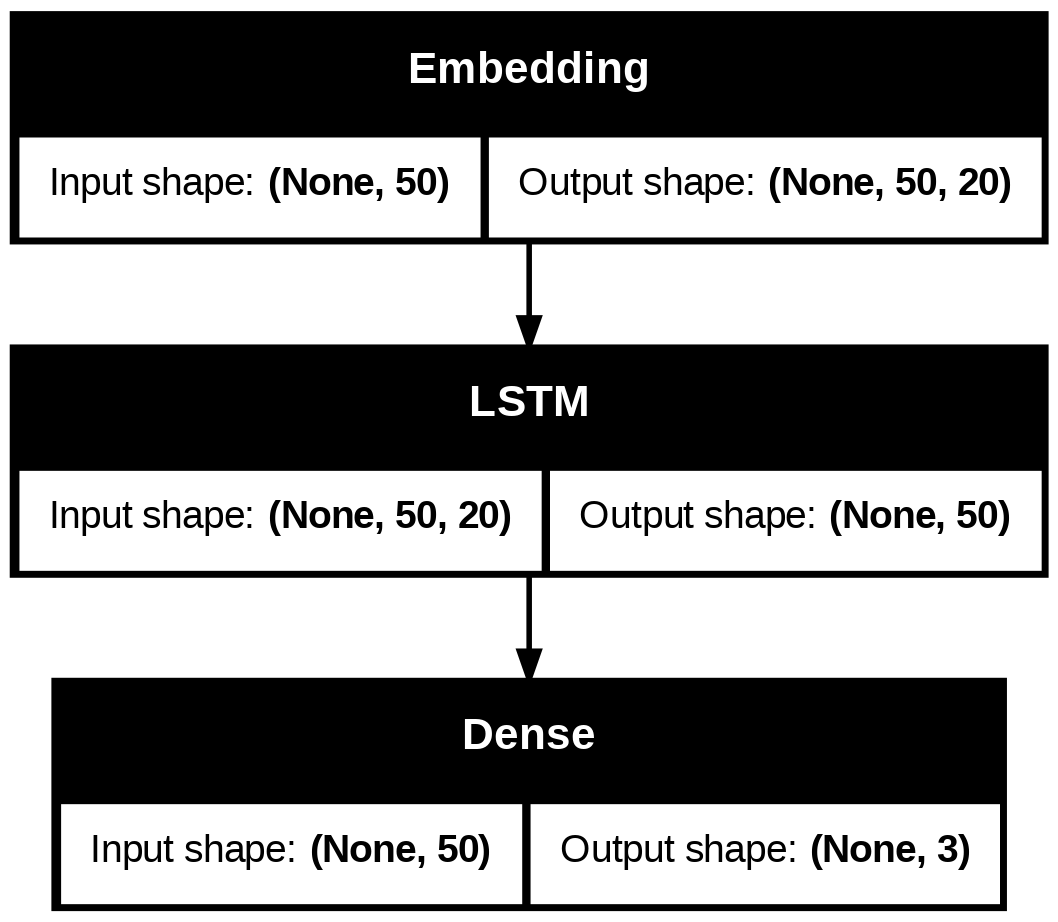

In [96]:
model.build(input_shape=(None, X.shape[1]))  # Specify the input shape for building
plot_model(model, to_file='model.png', show_shapes=True)

In [97]:

# to Train the model split the datapoints
Y = pd.get_dummies(df['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4113, 50) (4113, 3)
(726, 50) (726, 3)


In [98]:
batch_size = 32 # 32 batches are made
# Train those 32 batches separetly and check there accurecy
history=model.fit(X_train, Y_train, epochs =50, batch_size=batch_size, verbose = 2)

Epoch 1/50
129/129 - 7s - 57ms/step - accuracy: 0.6188 - loss: 0.8777
Epoch 2/50
129/129 - 5s - 37ms/step - accuracy: 0.7136 - loss: 0.6595
Epoch 3/50
129/129 - 3s - 23ms/step - accuracy: 0.8130 - loss: 0.4421
Epoch 4/50
129/129 - 5s - 40ms/step - accuracy: 0.9098 - loss: 0.2513
Epoch 5/50
129/129 - 6s - 43ms/step - accuracy: 0.9538 - loss: 0.1486
Epoch 6/50
129/129 - 3s - 23ms/step - accuracy: 0.9723 - loss: 0.0939
Epoch 7/50
129/129 - 6s - 43ms/step - accuracy: 0.9823 - loss: 0.0675
Epoch 8/50
129/129 - 6s - 43ms/step - accuracy: 0.9830 - loss: 0.0618
Epoch 9/50
129/129 - 3s - 24ms/step - accuracy: 0.9893 - loss: 0.0455
Epoch 10/50
129/129 - 5s - 38ms/step - accuracy: 0.9898 - loss: 0.0400
Epoch 11/50
129/129 - 8s - 66ms/step - accuracy: 0.9932 - loss: 0.0251
Epoch 12/50
129/129 - 7s - 53ms/step - accuracy: 0.9947 - loss: 0.0203
Epoch 13/50
129/129 - 7s - 55ms/step - accuracy: 0.9949 - loss: 0.0179
Epoch 14/50
129/129 - 4s - 30ms/step - accuracy: 0.9951 - loss: 0.0192
Epoch 15/50
129

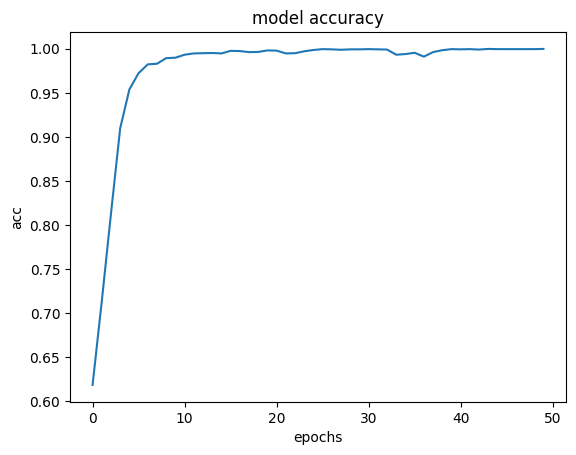

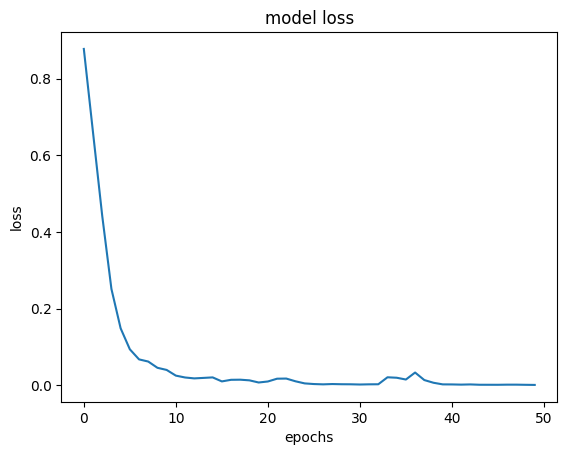

<Figure size 640x480 with 0 Axes>

In [99]:
# Plot the results (Accurecy and loss)

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [100]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

129/129 - 1s - 10ms/step - accuracy: 0.9998 - loss: 6.9727e-04
23/23 - 0s - 11ms/step - accuracy: 0.7397 - loss: 2.1545
Train: 1.000, Test: 0.7397


In [101]:
# Predict probabilities for the test set
yhat_probs = model.predict(X_test, verbose=0)
print(yhat_probs)

# Predict the class with the highest probability for each sample
yhat_classes = np.argmax(yhat_probs, axis=1)
print(yhat_classes)


[[3.4962972e-07 9.9999899e-01 6.0264608e-07]
 [2.1662001e-07 9.9999934e-01 3.4261046e-07]
 [4.5961974e-06 9.9999243e-01 2.8064769e-06]
 ...
 [1.4800237e-03 9.9843889e-01 8.1046492e-05]
 [9.9532193e-01 4.5719901e-03 1.0611467e-04]
 [2.8128685e-05 9.9991131e-01 6.0520739e-05]]
[1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 2 0 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 2 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 2 0 1 0 1 2 0 1 1 2 1 1 1 0 0 1 1
 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 2 1 2 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 2 2 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 1 1 2 1 1 0 2 1 1 0 1 0 2 1 1 1 0 1 1 0 0 1 1 2 0 0 1 0 1 0 1 1 2
 2 1 1 1 1 1 2 0 2 1 0 0 2 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 2 0 1 1 1
 1 1 1 1 1 0 0 1 1 1 2 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 2
 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 2 1 0 1 0 1 1 2 1 1 1 1 2 1 1 1 0 1 2 1
 2 0 0 0 0 2 1 1 1 1 0 0 0 0 0 2 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 

In [102]:
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2,
       0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1,
       2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2,
       1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1,
       1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0,
       2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0,

In [103]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, yhat_classes)
cm

array([[132,  85,   5],
       [ 50, 357,  10],
       [ 12,  27,  48]])

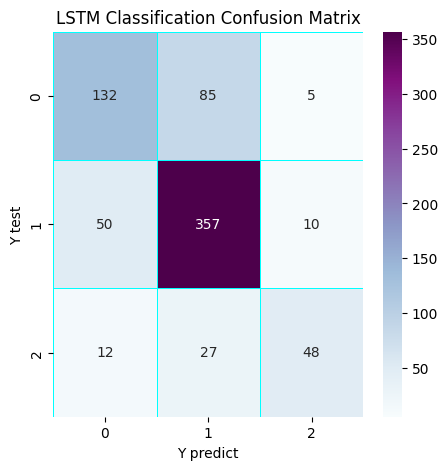

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

lstm_val = confusion_matrix(rounded_labels, yhat_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lstm_val, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('LSTM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [105]:
# Validation
validation_size = 610

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7933 - loss: 1.7263
score: 1.80
acc: 0.79


In [119]:
# Save the LSTM model
model.save('lstm_sentiment_model.h5')

In [107]:
# Validation 1
message = ['Congratulations! you have won a $1,000 Walmart gift card']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.3049511  0.60329074 0.09175809]] 1


In [108]:
# Validation 2
message = ['such massive asteroid hit will certainly create new business opportunities']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[9.7863984e-01 5.7056040e-04 2.0789625e-02]] 0


In [109]:
# Validation 3
message = ['so does anyone else not open Snapchat anymore ? or is it just me ... ugh this so sad.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[1.1658916e-07 9.9999964e-01 2.4503939e-07]] 1


In [110]:
# Validation 4
message = ['@elonmusk had a terrible experience with a very pushy sales guy from tesla Stanford shop while shopping for model x']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.83322936 0.16510347 0.00166728]] 0


In [111]:
# Validation 5
message = ['The local electronics industry is expected to remain stable amid layoff concerns surrounding Japanese electronics giants operating in the country, an official says.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[2.896275e-04 9.995247e-01 1.856489e-04]] 1


In [112]:
# Validation 6
message = ['The local electronics industry is amid layoff concerns and last year has laid off tens of employees']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[2.9568767e-04 1.8377577e-07 9.9970406e-01]] 2


In [113]:
#Validation 7
message = ["The company's profits have skyrocketed this quarter, and employees are thrilled with the new opportunities for growth and innovation."]
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[0.46655053 0.5291942  0.0042553 ]] 1


In [114]:
#Validation 8
message = ["its looking too bad"]
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.0827347  0.06851306 0.84875226]] 2


In [115]:
#Validation 9
message = ["The product quality is very poor, and I am extremely disappointed with my purchase."]
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[1.3694669e-05 9.9998343e-01 2.8759018e-06]] 1


In [116]:
#Validation 10
message = ["The meeting is scheduled for next Tuesday at 10 AM."]
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[1.1062780e-06 9.9999678e-01 2.1643805e-06]] 1


In [117]:
#Validation 11
message = ["The project faced multiple delays and ended in failure."]
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[5.9567304e-07 9.9999845e-01 1.0098088e-06]] 1
